In [28]:
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mgimg

In [29]:
# generate positive class
minx, maxx, miny, maxy = -10, 1, -10, 1
def generate_training_set(k):
    N = P = k    
    x_random1 = random.uniform(minx, maxx)
    x_random2 = random.uniform(minx, maxx)    
    
    training_set = []
    for x in xrange(0, P, 1):
        x_coord = random.uniform(minx, max(x_random1, x_random2))
        # ур-ие прямой (x - x_rand1)/(x_rand1-x_rand2) = (y - ymin)/(ymin - ymax)
        y_for_line = miny + (miny - maxy)*(x_coord - x_random1)/(x_random1 - x_random2)
        if x_coord < min(x_random1, x_random2):
            y_coord = random.uniform(miny, maxy)
        elif x_random1 < x_random2:
            y_coord = random.uniform(y_for_line, maxy)
        else:
            y_coord = random.uniform(miny, y_for_line)
        training_set.append((np.array([1, x_coord, y_coord]), 1))
        
        # generate negative class
    for x in xrange(0, N, 1):
        x_coord = random.uniform(min(x_random1, x_random2), maxx)
        # ур-ие прямой (x - x_rand1)/(x_rand1-x_rand2) = (y - ymin)/(ymin - ymax)
        y_for_line = miny + (miny - maxy)*(x_coord - x_random1)/(x_random1 - x_random2)
        if x_coord > max(x_random1, x_random2):
            y_coord = random.uniform(miny, maxy)
        elif x_random1 < x_random2:
            y_coord = random.uniform(miny, y_for_line)
        else:
            y_coord = random.uniform(y_for_line, maxy)
        training_set.append((np.array([1, x_coord, y_coord]), -1))
        
    return training_set

In [30]:
def sign(a):
    return bool(a > 0) - bool(a < 0)

w_for_drawing = []
incorrect_classifier_objects = []

# алгоритм Batch perceptron
def batch_perceptron(training_set):
    w = np.array([0, 0, 0])
    w_for_drawing.append(w)
    iteration = 0
    while True:
        improvement_possible = False
        for idx, training_element in enumerate(training_set):
            if (training_element[1] * sign(w.dot(training_element[0]))) <= 0:
                incorrect_classifier_objects.append(idx)
                w = w + training_element[1] * training_element[0]
                w_for_drawing.append(w)
                improvement_possible = True
                iteration += 1
                break
        if not improvement_possible:
            return iteration

In [31]:
training_set = generate_training_set(2)
batch_perceptron(training_set)

14

Beggining state


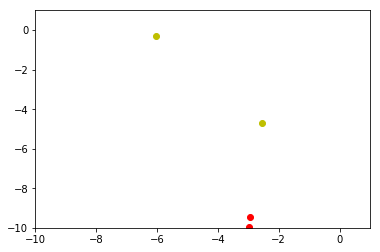

Incorrect classifier object(black) and current dividing line


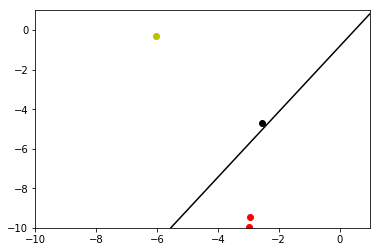

Dividing line on previous step (dashed line) and current dividing line


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in long_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in long_scalars


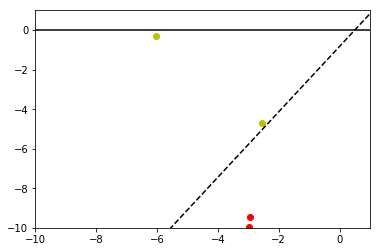

Incorrect classifier object(black) and current dividing line


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in long_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in long_scalars


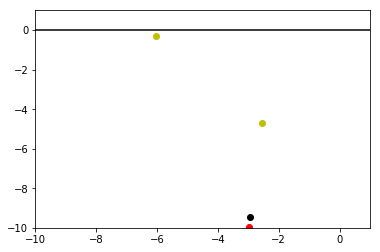

Dividing line on previous step (dashed line) and current dividing line


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in long_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in long_scalars


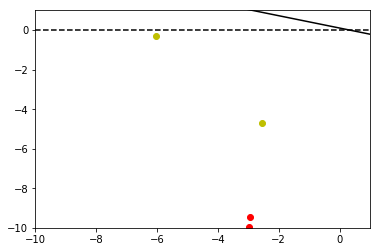

Incorrect classifier object(black) and current dividing line


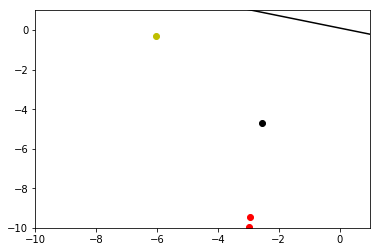

Dividing line on previous step (dashed line) and current dividing line


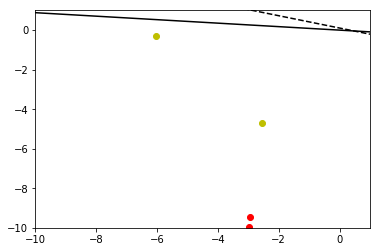

Incorrect classifier object(black) and current dividing line


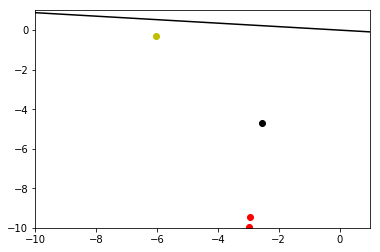

Dividing line on previous step (dashed line) and current dividing line


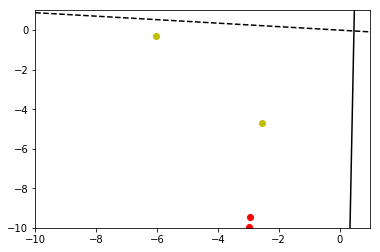

Incorrect classifier object(black) and current dividing line


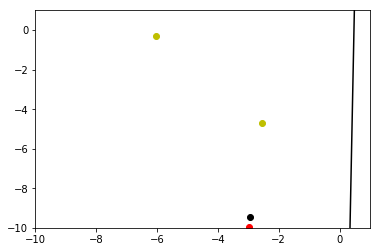

Dividing line on previous step (dashed line) and current dividing line


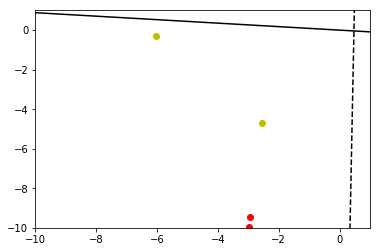

Incorrect classifier object(black) and current dividing line


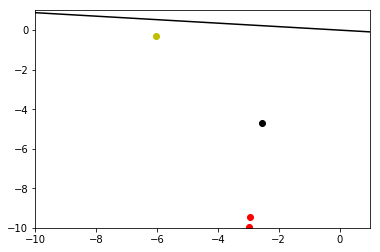

Dividing line on previous step (dashed line) and current dividing line


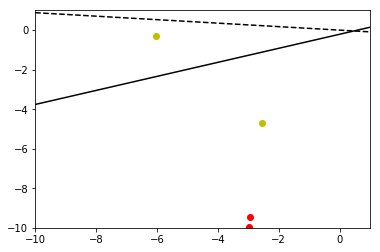

Incorrect classifier object(black) and current dividing line


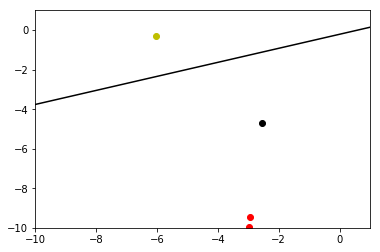

Dividing line on previous step (dashed line) and current dividing line


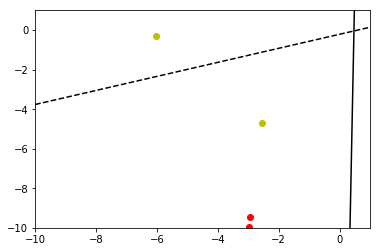

Incorrect classifier object(black) and current dividing line


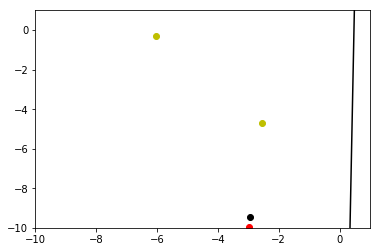

Dividing line on previous step (dashed line) and current dividing line


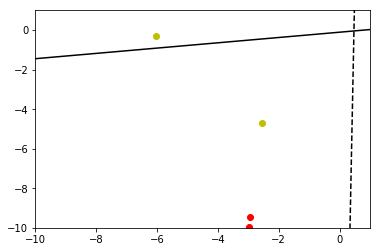

Incorrect classifier object(black) and current dividing line


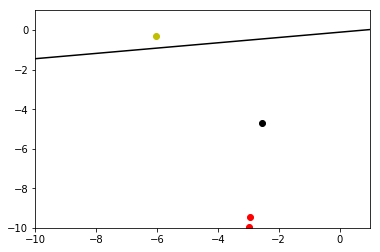

Dividing line on previous step (dashed line) and current dividing line


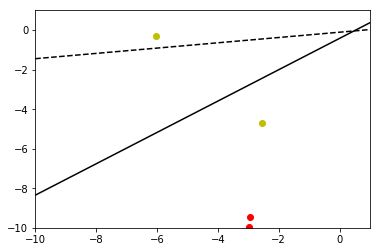

Incorrect classifier object(black) and current dividing line


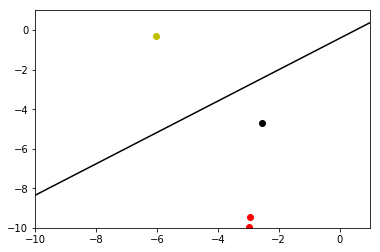

Dividing line on previous step (dashed line) and current dividing line


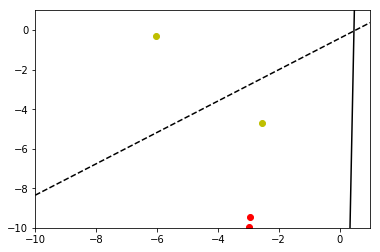

Incorrect classifier object(black) and current dividing line


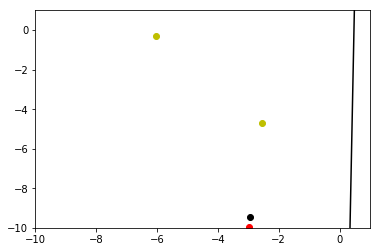

Dividing line on previous step (dashed line) and current dividing line


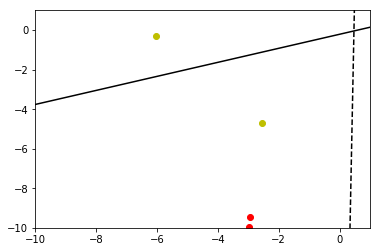

Incorrect classifier object(black) and current dividing line


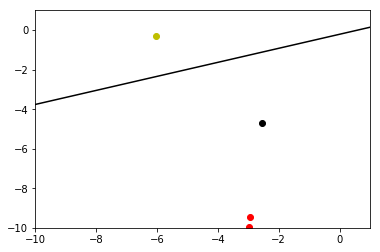

Dividing line on previous step (dashed line) and current dividing line


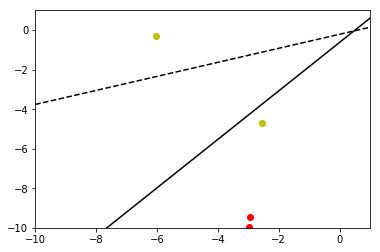

Incorrect classifier object(black) and current dividing line


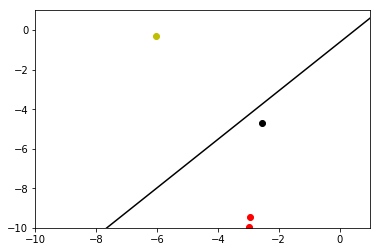

Dividing line on previous step (dashed line) and current dividing line


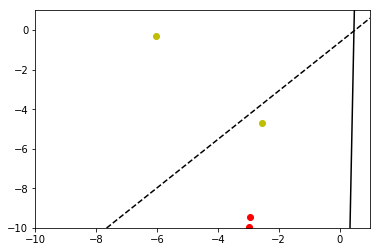

Incorrect classifier object(black) and current dividing line


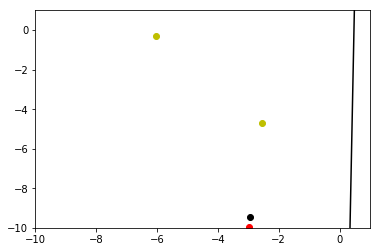

Dividing line on previous step (dashed line) and current dividing line


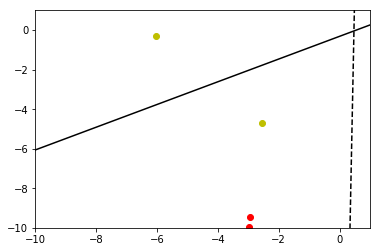

Incorrect classifier object(black) and current dividing line


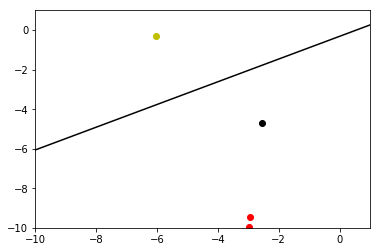

Dividing line on previous step (dashed line) and current dividing line


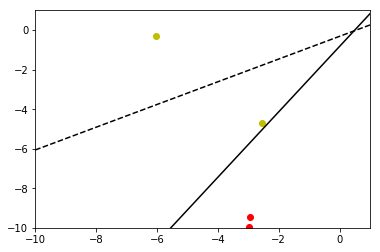

In [32]:
# visualization
% matplotlib inline


def draw_training_set(incorrect_classifier_object=-1):
    plt.axis([minx, maxx, miny, maxy])
    for idx, element in enumerate(training_set):
        if idx == incorrect_classifier_object:
            # чёрным рисуем неправильно квалифицированный на данном шаге объект
            plt.plot(element[0][1], element[0][2], 'ko')
        else:
            plt.plot(element[0][1], element[0][2], 'ro' if element[1] == 1 else 'yo')


print "Beggining state"
draw_training_set()
plt.show()

for x, w in enumerate(w_for_drawing):
    print "Incorrect classifier object(black) and current dividing line"
    draw_training_set(incorrect_classifier_objects[x - 1])
    plt.plot([minx, maxx], [(-1 * w_for_drawing[x - 1][0] - w_for_drawing[x - 1][1] * minx) / w_for_drawing[x - 1][2],
                            (-1 * w_for_drawing[x - 1][0] - w_for_drawing[x - 1][1] * maxx) / w_for_drawing[x - 1][2]],
             color='black')
    plt.show()

    plt.axis([minx, maxx, miny, maxy])
    print "Dividing line on previous step (dashed line) and current dividing line"
    draw_training_set()
    plt.plot([minx, maxx], [(-1 * w_for_drawing[x - 1][0] - w_for_drawing[x - 1][1] * minx) / w_for_drawing[x - 1][2],
                            (-1 * w_for_drawing[x - 1][0] - w_for_drawing[x - 1][1] * maxx) / w_for_drawing[x - 1][2]],
             linestyle='--', color='black')  # previous step
    plt.plot([minx, maxx], [(-1 * w_for_drawing[x][0] - w_for_drawing[x][1] * minx) / w_for_drawing[x][2],
                            (-1 * w_for_drawing[x][0] - w_for_drawing[x][1] * maxx) / w_for_drawing[x][2]],
             color='black')
    plt.show()